In [5]:
import pandas as pd
!pip install prophet
from prophet import Prophet
import numpy as np

In [6]:
data = pd.read_csv('~/Desktop/total_df.csv') 

In [7]:
data

Unnamed: 0        date  indices_NDVI_mean  indices_NDMI_mean  \
0               0  2017-01-16           0.547600          -0.109000   
1               1  2017-01-17           0.545972          -0.109379   
2               2  2017-01-18           0.544369          -0.109753   
3               3  2017-01-19           0.542791          -0.110120   
4               4  2017-01-20           0.541240          -0.110481   
...           ...         ...                ...                ...   
98912       98912  2022-11-19           0.812552          -0.416026   
98913       98913  2022-11-20           0.828517          -0.420349   
98914       98914  2022-11-21           0.850407          -0.425451   
98915       98915  2022-11-22           0.877481          -0.431183   
98916       98916  2022-11-23           0.909000          -0.437400   

       indices_NBSI_mean     name  tavg  tmin  tmax  prcp  snow   wdir  wspd  \
0               0.031400  alkmaar  -0.9  -2.8   2.4   NaN   NaN   58.0   8.7   
1               0.033362  alkmaar  -2.6  -4.2  -1.0   NaN   NaN    NaN   NaN   
2               0.035305  alkmaar   NaN   NaN   NaN   NaN   NaN    NaN   NaN   
3               0.037228  alkmaar  -2.2  -5.6   3.7   NaN   NaN    NaN   NaN   
4               0.039132  alkmaar  -1.7  -4.9   3.8   NaN   NaN   54.0   7.1   
...                  ...      ...   ...   ...   ...   ...   ...    ...   ...   
98912           0.415701  zuthpen   0.3  -4.2   3.2   0.0   NaN   69.0  15.0   
98913           0.358998  zuthpen  -2.1  -7.7   2.0  13.2   NaN   95.0   7.2   
98914           0.279636  zuthpen   3.5   1.0   6.5   2.2   NaN  115.0  10.8   
98915           0.179082  zuthpen   6.2   4.0   7.5   1.9   NaN  168.0  16.8   
98916           0.058800  zuthpen   8.2   7.1  10.5   1.7   NaN  182.0  18.3   

       wpgt    pres  tsun  
0       NaN     NaN   NaN  
1       NaN     NaN   NaN  
2       NaN     NaN   NaN  
3       NaN     NaN   NaN  
4       NaN     NaN   NaN  
...     ...     ...   ...  
98912  35.2  1012.4   NaN  
98913  24.1  1009.3   NaN  
98914  29.6  1000.8   NaN  
98915  33.3   992.8   NaN  
98916  37.0   997.1   NaN  

[98917 rows x 16 columns]

In [8]:
df = data[['date', 'indices_NDVI_mean', 'name']]

In [9]:
df

date  indices_NDVI_mean     name
0      2017-01-16           0.547600  alkmaar
1      2017-01-17           0.545972  alkmaar
2      2017-01-18           0.544369  alkmaar
3      2017-01-19           0.542791  alkmaar
4      2017-01-20           0.541240  alkmaar
...           ...                ...      ...
98912  2022-11-19           0.812552  zuthpen
98913  2022-11-20           0.828517  zuthpen
98914  2022-11-21           0.850407  zuthpen
98915  2022-11-22           0.877481  zuthpen
98916  2022-11-23           0.909000  zuthpen

[98917 rows x 3 columns]

In [10]:
df = df.dropna()

In [11]:
df['date'] = pd.to_datetime(df['date'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98917 entries, 0 to 98916
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               98917 non-null  datetime64[ns]
 1   indices_NDVI_mean  98917 non-null  float64       
 2   name               98917 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 2.3+ MB


In [13]:
df.columns = ['ds', 'y', 'ticker']
df.tail()

ds         y   ticker
98912 2022-11-19  0.812552  zuthpen
98913 2022-11-20  0.828517  zuthpen
98914 2022-11-21  0.850407  zuthpen
98915 2022-11-22  0.877481  zuthpen
98916 2022-11-23  0.909000  zuthpen

In [62]:
# get max dates
max_dates = df.groupby(['ticker']).agg({'ds': [np.min,np.max]})

# column_headers = list(max_dates.columns.values)
# print("The Column Header :", column_headers)
# max_dates
max_dates['max_date'] = max_dates[('ds', 'amax')]
max_dates['max_date']

ticker
alkmaar         2022-12-16
almelo          2022-11-23
almere          2022-12-13
almkerk         2022-12-16
arnhem          2022-12-16
assen           2022-12-08
biddinghuizen   2022-11-23
delft           2022-12-16
dronten         2022-11-23
eindhoven       2022-12-06
emmeloord       2022-11-23
ens             2022-12-13
franeker        2022-11-23
geldermalsen    2022-12-16
groenlo         2022-12-13
helmond         2022-11-23
hoogeveen       2022-12-13
hoorn           2022-12-16
leersum         2022-12-21
leeuwarden      2022-12-13
lochem          2022-11-23
luttelgeest     2022-10-24
maastricht      2022-11-23
middelburg      2022-12-29
middelharnis    2022-12-16
montfoort       2022-12-16
nagele          2022-12-26
nijverdal       2022-12-13
oldenzaal       2022-12-13
oss             2022-12-06
oudekerk        2022-12-16
raalte          2022-12-21
roosendaal      2022-12-16
schijndel       2022-12-06
schoonhoven     2022-12-16
sneek           2022-12-13
tilburg         2022-

In [14]:
# Group the data by ticker
groups_by_ticker = df.groupby('ticker')
# Check the groups in the dataframe
ticker_list = list(set(list(df['ticker'])))

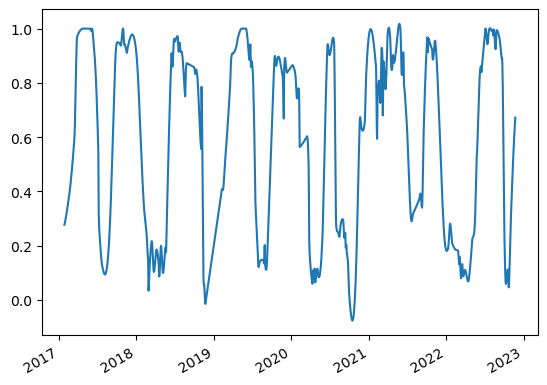

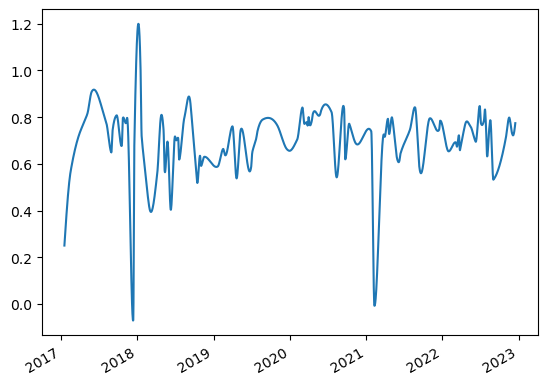

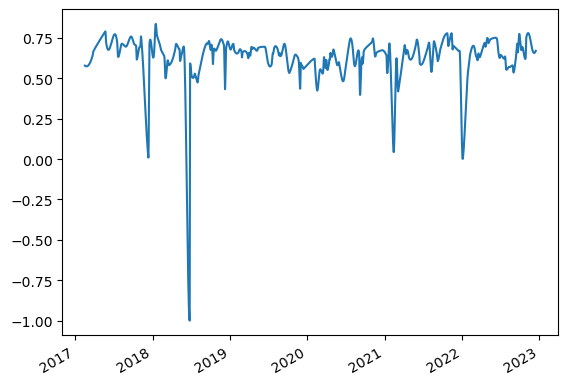

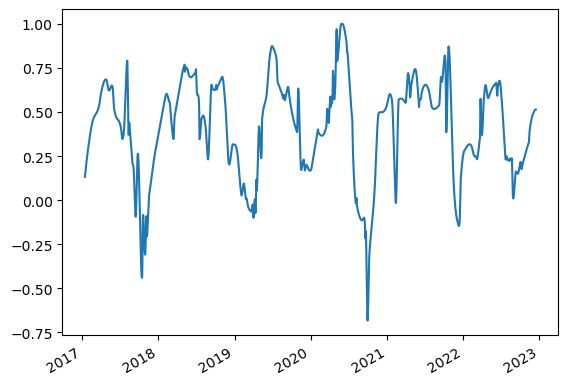

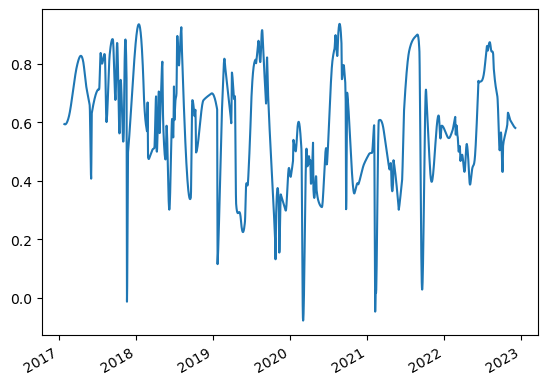

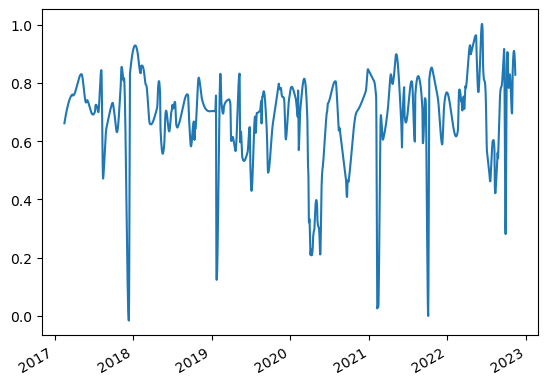

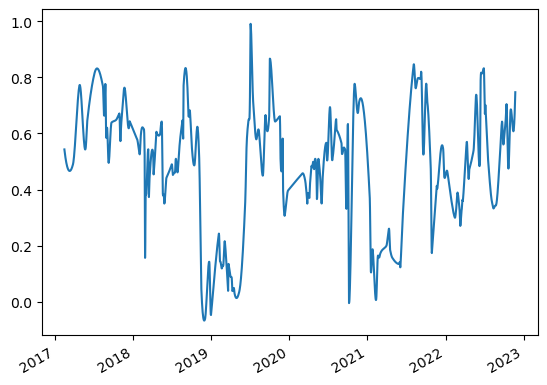

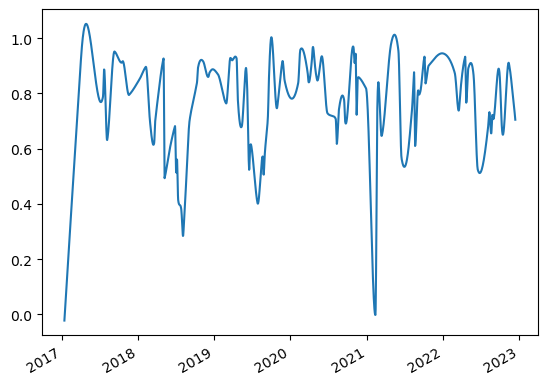

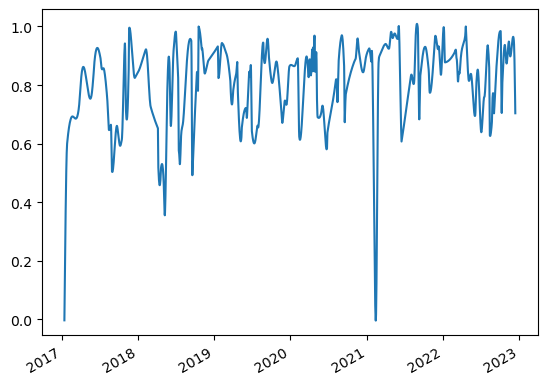

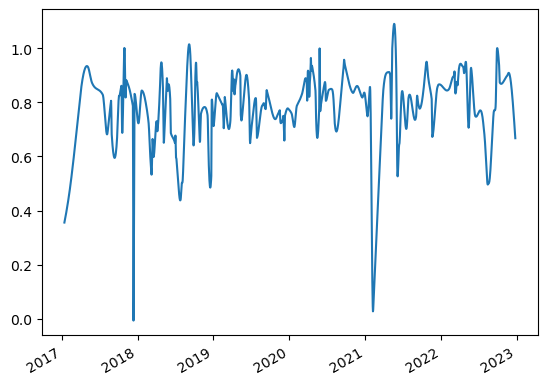

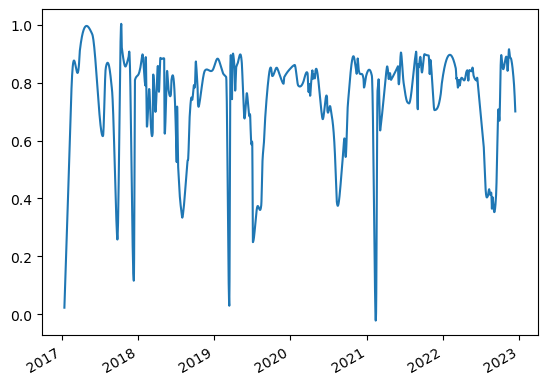

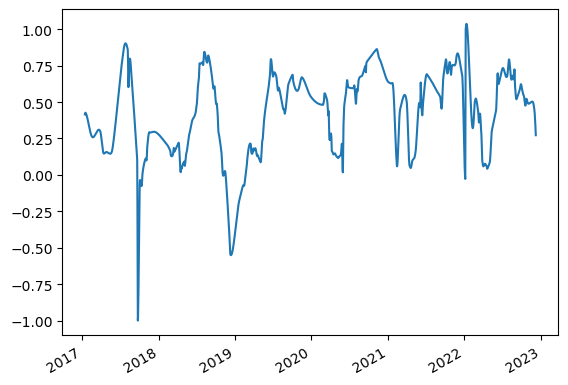

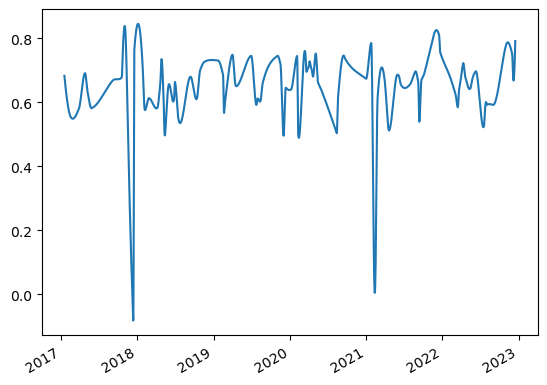

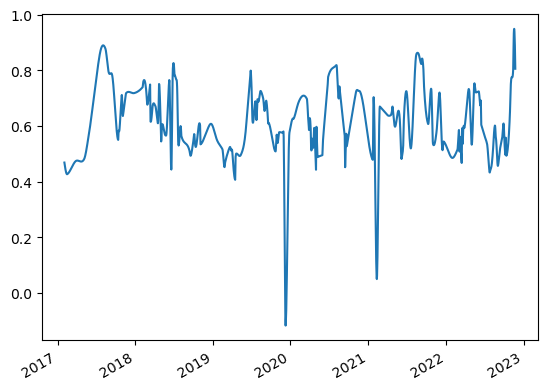

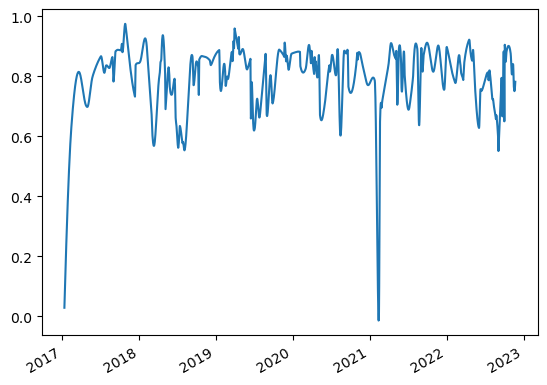

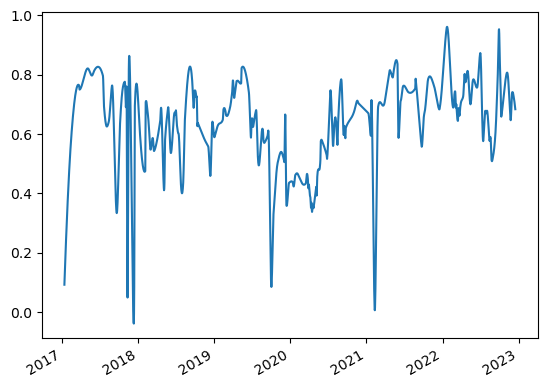

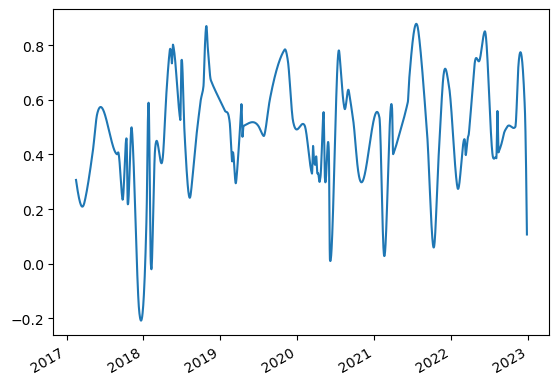

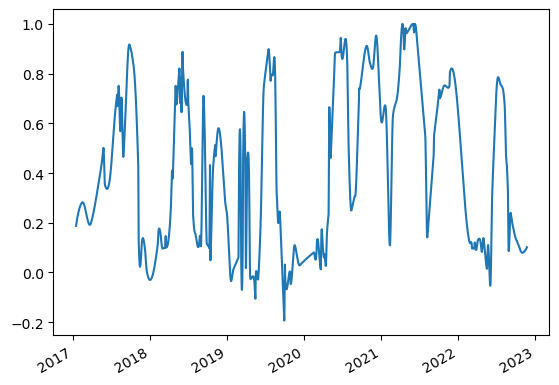

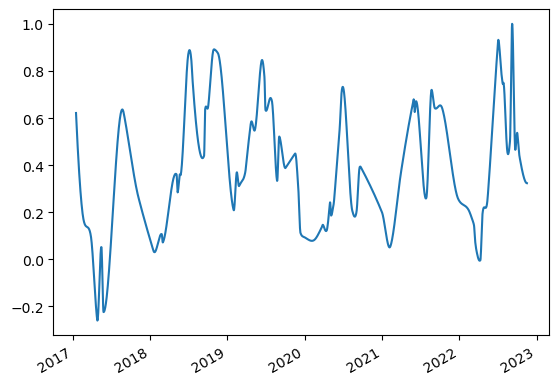

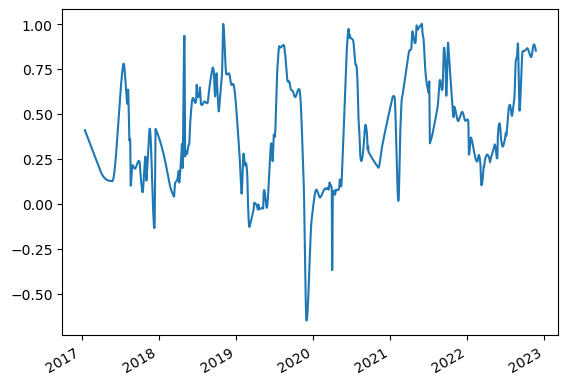

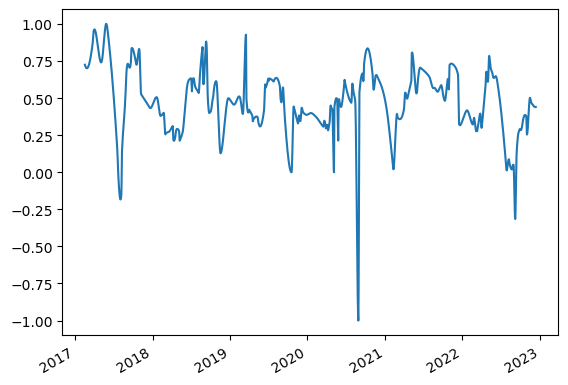

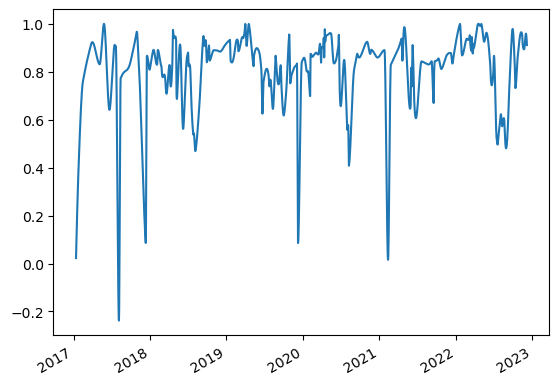

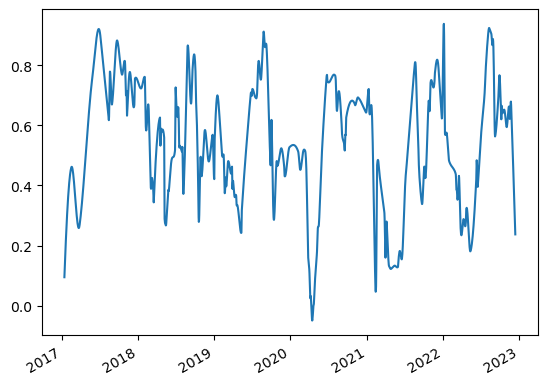

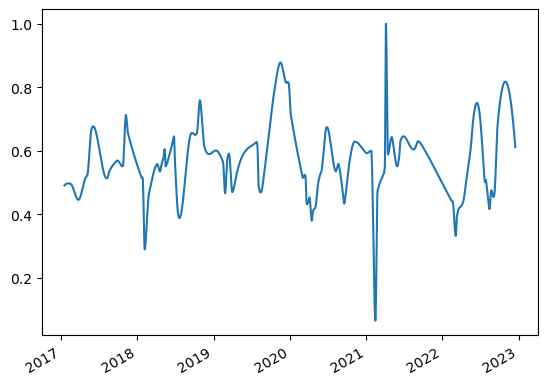

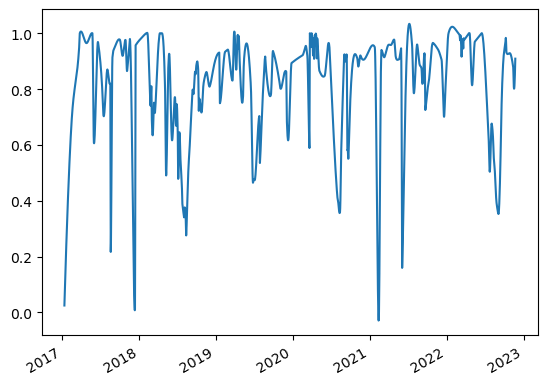

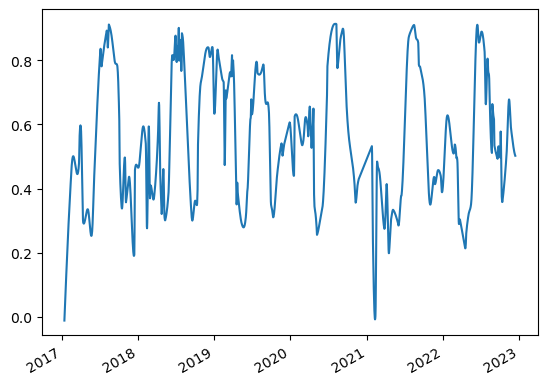

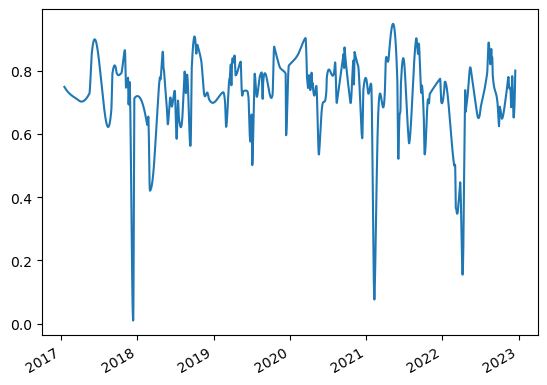

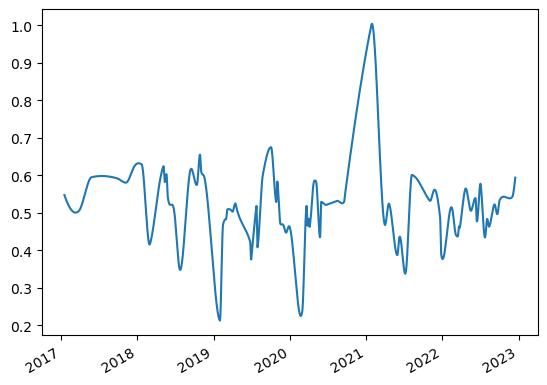

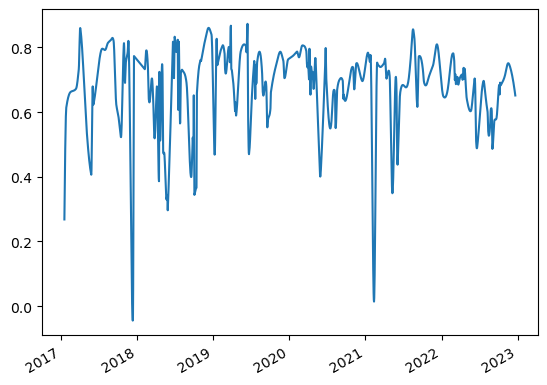

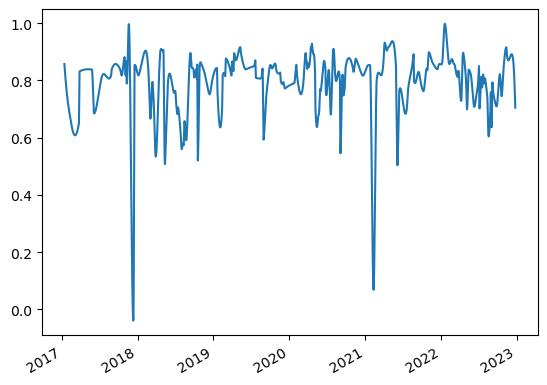

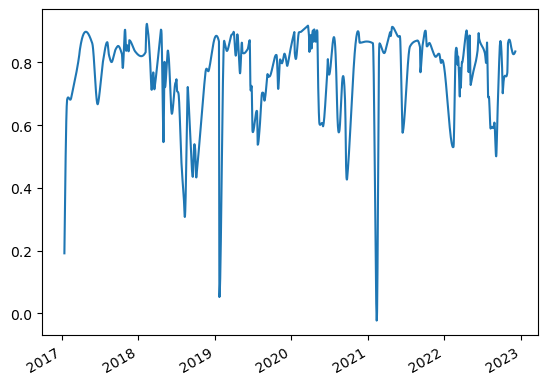

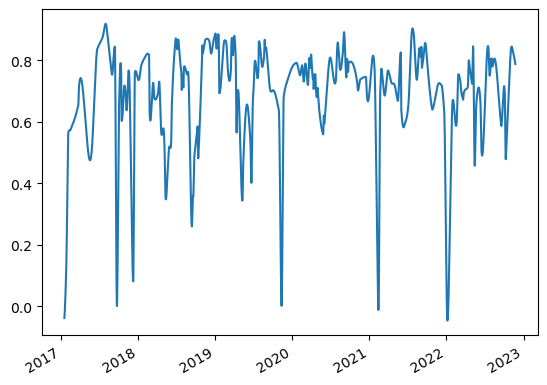

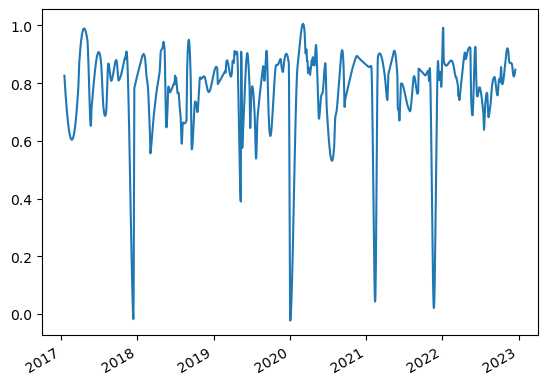

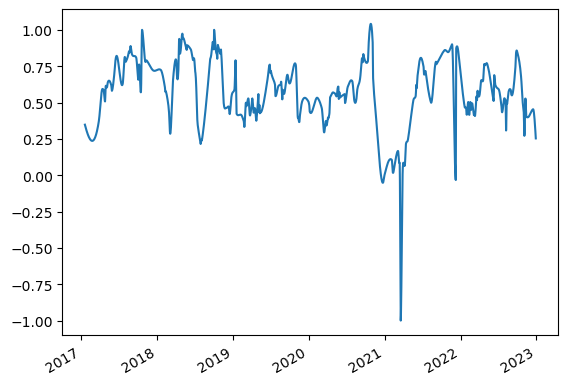

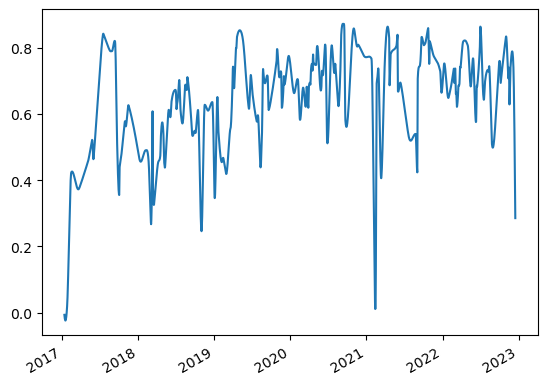

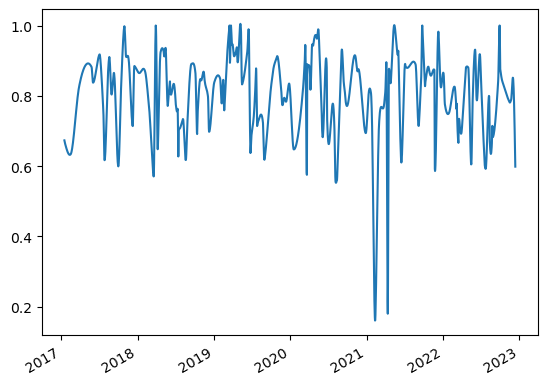

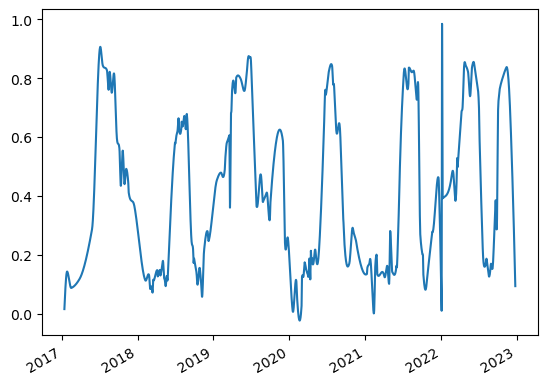

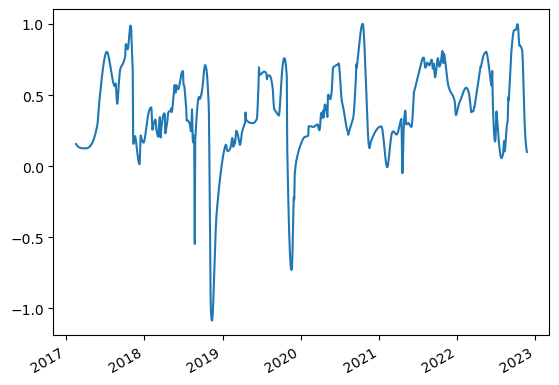

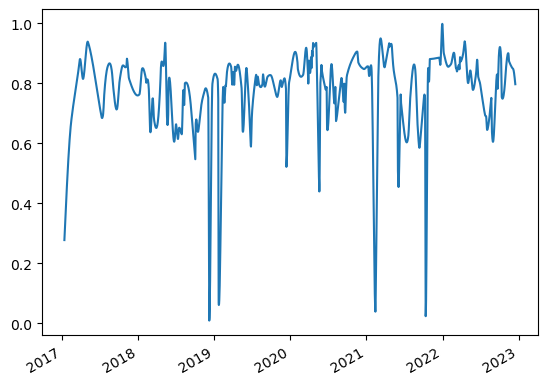

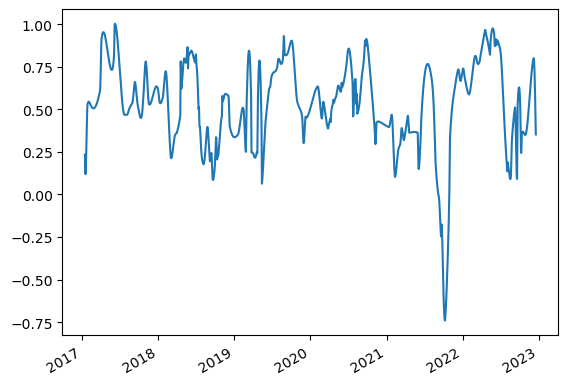

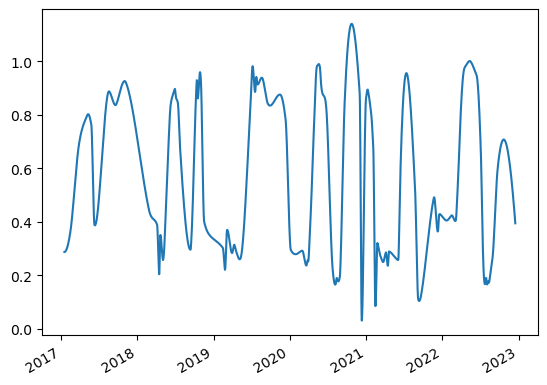

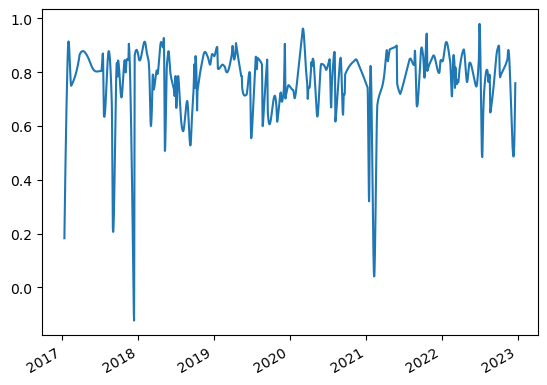

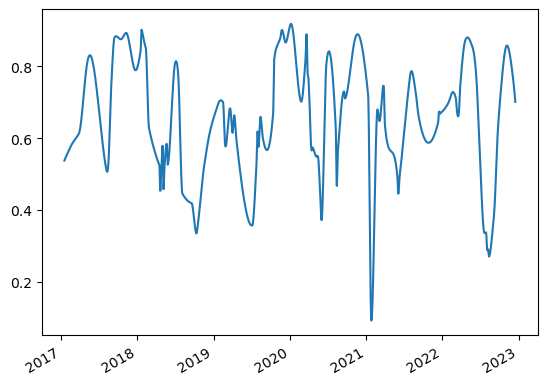

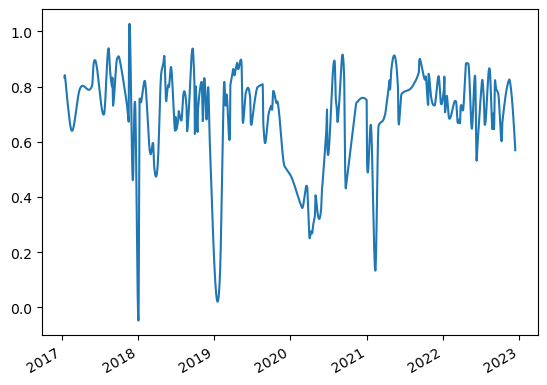

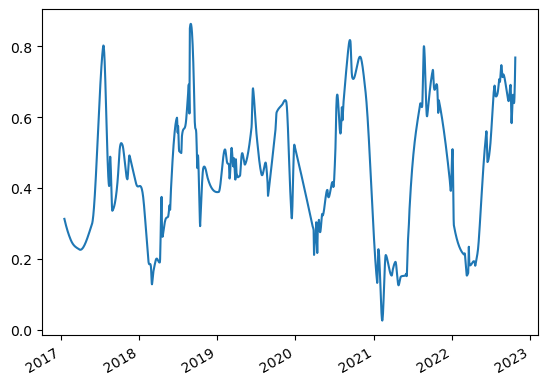

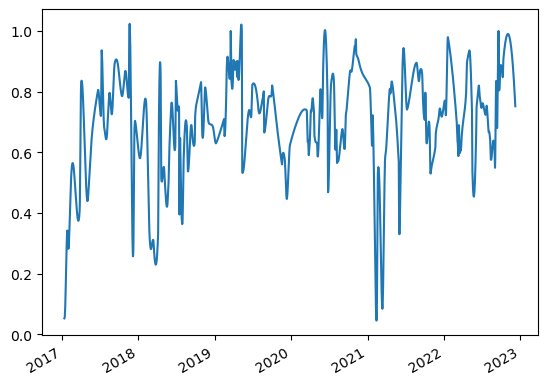

In [15]:
import matplotlib.pyplot as plt

# plot for each place
for ticker in ticker_list:
    group = groups_by_ticker.get_group(ticker)

    x = group['ds']
    y = group['y']
    
        # plot
    plt.plot(x,y)
    # beautify the x-labels
    plt.gcf().autofmt_xdate()

    plt.show()


In [155]:
def train_and_forecast(group, days, observed_values):
    # Initiate the model
    m = Prophet()

    # Fit the model
    m.fit(group)
    
    zeros_list = [0] * days
    observed_values_list = observed_values + zeros_list
    
    # Make predictions
    future = m.make_future_dataframe(periods = days)
    forecast = m.predict(future)[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
    forecast['ticker'] = group['ticker'].iloc[0]
    
    forecast['observed_values'] = observed_values_list
    
#     # To print the dataframe
#     m.plot(forecast)
#     return print(plt.show())

    # Return the forecasted results
    return forecast[['ds', 'ticker', 'yhat', 'yhat_upper', 'yhat_lower', 'observed_values']]

In [156]:
# Create an empty dataframe
for_loop_forecast = pd.DataFrame()

# Loop through each ticker
for ticker in ticker_list:
    
    # Get the data for the ticker
    group = groups_by_ticker.get_group(ticker)
    observed_values = list(group['y'])
    
#     max_date = max_dates.loc[ticker]['max_date']
    
    # days
    days = 365
    
    # Make forecast
    forecast = train_and_forecast(group, days, observed_values)
    
    # Add the forecast results to the dataframe
    for_loop_forecast = pd.concat((for_loop_forecast, forecast))


20:44:48 - cmdstanpy - INFO - Chain [1] start processing
20:44:49 - cmdstanpy - INFO - Chain [1] done processing
20:44:50 - cmdstanpy - INFO - Chain [1] start processing
20:44:50 - cmdstanpy - INFO - Chain [1] done processing
20:44:51 - cmdstanpy - INFO - Chain [1] start processing
20:44:51 - cmdstanpy - INFO - Chain [1] done processing
20:44:52 - cmdstanpy - INFO - Chain [1] start processing
20:44:53 - cmdstanpy - INFO - Chain [1] done processing
20:44:54 - cmdstanpy - INFO - Chain [1] start processing
20:44:54 - cmdstanpy - INFO - Chain [1] done processing
20:44:55 - cmdstanpy - INFO - Chain [1] start processing
20:44:56 - cmdstanpy - INFO - Chain [1] done processing
20:44:57 - cmdstanpy - INFO - Chain [1] start processing
20:44:58 - cmdstanpy - INFO - Chain [1] done processing
20:44:59 - cmdstanpy - INFO - Chain [1] start processing
20:44:59 - cmdstanpy - INFO - Chain [1] done processing
20:45:00 - cmdstanpy - INFO - Chain [1] start processing
20:45:01 - cmdstanpy - INFO - Chain [1]

In [114]:
forcasted = for_loop_forecast
print(forcasted)
forcasted.groupby('ticker')

             ds   ticker      yhat  yhat_upper  yhat_lower  observed_values
0    2017-02-02  helmond  0.431116    0.559798    0.304786         0.468400
1    2017-02-03  helmond  0.431167    0.562994    0.300646         0.463062
2    2017-02-04  helmond  0.431322    0.563485    0.298929         0.457895
3    2017-02-05  helmond  0.431347    0.562937    0.308377         0.452951
4    2017-02-06  helmond  0.431451    0.563386    0.291397         0.448278
...         ...      ...       ...         ...         ...              ...
2521 2023-12-09      ens  0.667463    0.847371    0.491599         0.000000
2522 2023-12-10      ens  0.668362    0.832453    0.498276         0.000000
2523 2023-12-11      ens  0.669117    0.851538    0.487667         0.000000
2524 2023-12-12      ens  0.669895    0.834097    0.489107         0.000000
2525 2023-12-13      ens  0.673012    0.854132    0.492105         0.000000

[115707 rows x 6 columns]


# evaluation

In [111]:
# plot expected vs actual
y_true = df['y'].values
y_pred = forcasted['yhat'].values

# plot expected vs actual
pyplot.plot(y_true, label='Actual')
pyplot.plot(y_pred, label='Predicted')
pyplot.legend()
pyplot.show()

pyplot.plot(y_true, label='Actual')
pyplot.plot(y_pred, label='Predicted')
pyplot.legend()
pyplot.show())

/var/folders/4d/_hvc8l4d27x_0_349j1cpw7r0000gn/T/ipykernel_63427/1106354577.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group.drop(group.tail(n).index,


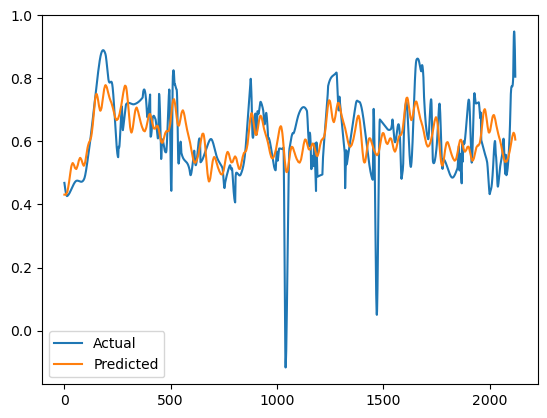

MAE: 0.009969609758171545
RMSE: 0.09984793316925265


/var/folders/4d/_hvc8l4d27x_0_349j1cpw7r0000gn/T/ipykernel_63427/1106354577.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group.drop(group.tail(n).index,


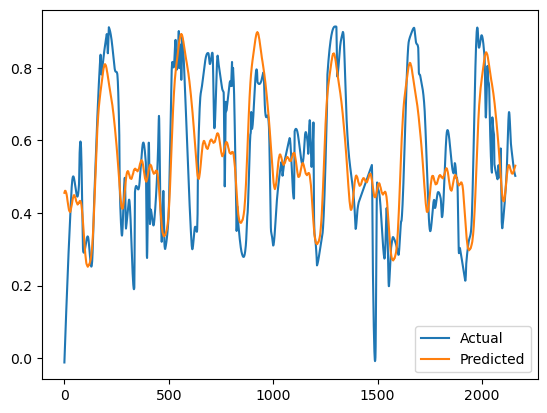

MAE: 0.017759053380115665
RMSE: 0.13326309834352368


/var/folders/4d/_hvc8l4d27x_0_349j1cpw7r0000gn/T/ipykernel_63427/1106354577.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group.drop(group.tail(n).index,


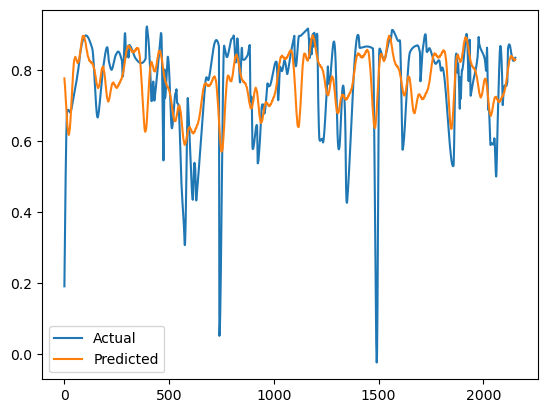

MAE: 0.01234604747425637
RMSE: 0.1111127691773379


/var/folders/4d/_hvc8l4d27x_0_349j1cpw7r0000gn/T/ipykernel_63427/1106354577.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group.drop(group.tail(n).index,


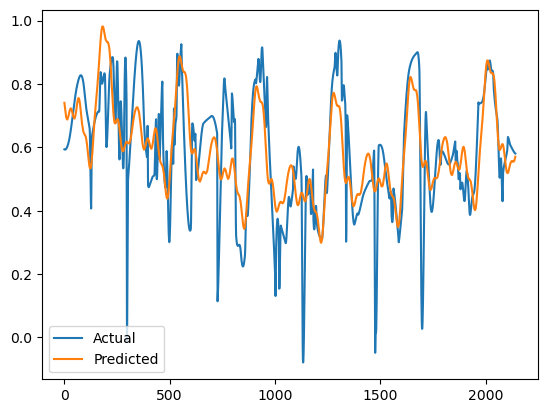

MAE: 0.017037588692172055
RMSE: 0.13052811456606603


/var/folders/4d/_hvc8l4d27x_0_349j1cpw7r0000gn/T/ipykernel_63427/1106354577.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group.drop(group.tail(n).index,


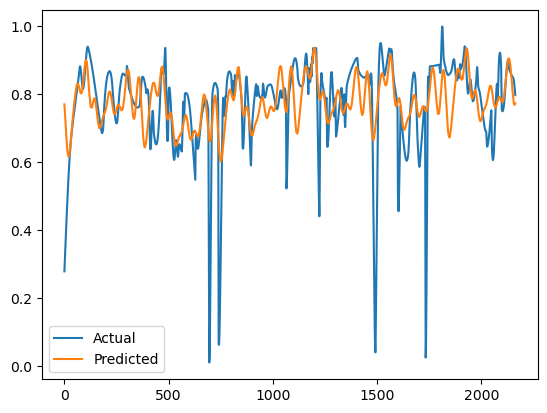

MAE: 0.012453075769192324
RMSE: 0.11159335002226756


/var/folders/4d/_hvc8l4d27x_0_349j1cpw7r0000gn/T/ipykernel_63427/1106354577.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group.drop(group.tail(n).index,


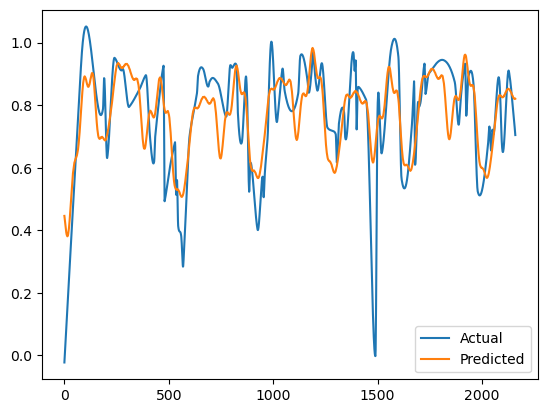

MAE: 0.014018299826402314
RMSE: 0.11839890128883086


/var/folders/4d/_hvc8l4d27x_0_349j1cpw7r0000gn/T/ipykernel_63427/1106354577.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group.drop(group.tail(n).index,


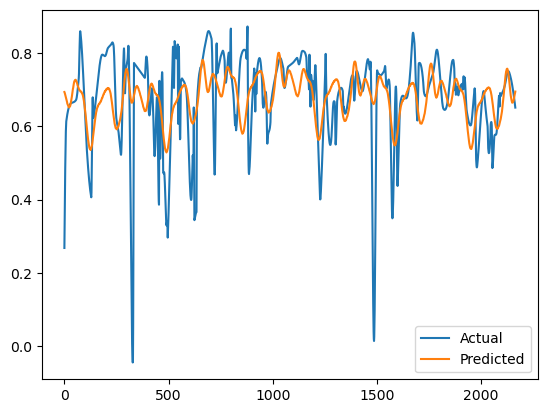

MAE: 0.01207513749979925
RMSE: 0.10988693052314844


/var/folders/4d/_hvc8l4d27x_0_349j1cpw7r0000gn/T/ipykernel_63427/1106354577.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group.drop(group.tail(n).index,


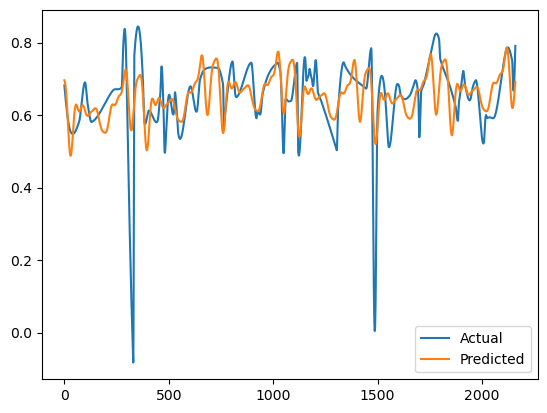

MAE: 0.00739232552492805
RMSE: 0.08597863411876261


/var/folders/4d/_hvc8l4d27x_0_349j1cpw7r0000gn/T/ipykernel_63427/1106354577.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group.drop(group.tail(n).index,


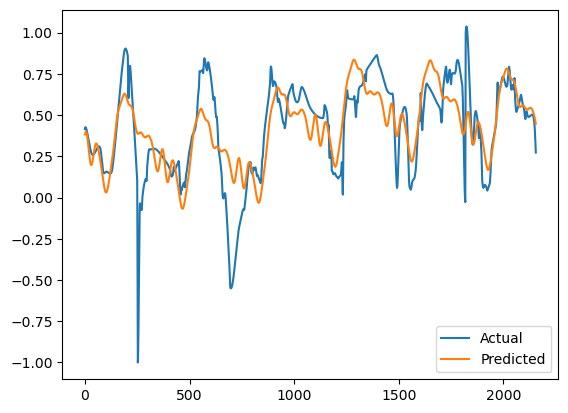

MAE: 0.03883305203642017
RMSE: 0.19706103632230337


/var/folders/4d/_hvc8l4d27x_0_349j1cpw7r0000gn/T/ipykernel_63427/1106354577.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group.drop(group.tail(n).index,


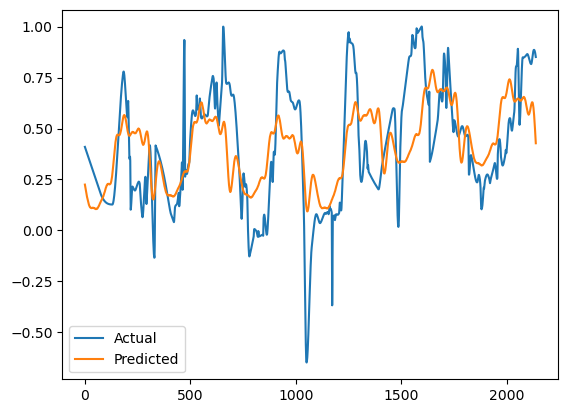

MAE: 0.05271150063750984
RMSE: 0.22958985308046573


/var/folders/4d/_hvc8l4d27x_0_349j1cpw7r0000gn/T/ipykernel_63427/1106354577.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group.drop(group.tail(n).index,


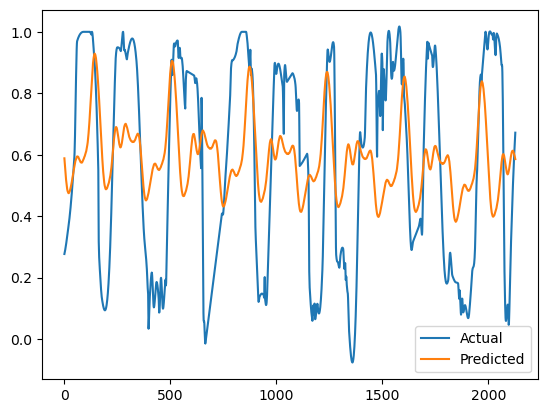

MAE: 0.1021749482403339
RMSE: 0.3196481632050056


/var/folders/4d/_hvc8l4d27x_0_349j1cpw7r0000gn/T/ipykernel_63427/1106354577.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group.drop(group.tail(n).index,


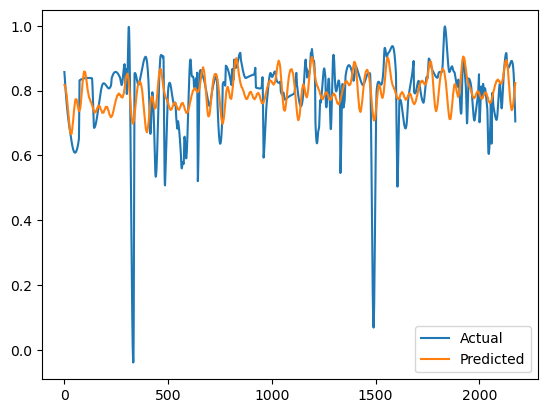

MAE: 0.010185808046898368
RMSE: 0.10092476428953584


/var/folders/4d/_hvc8l4d27x_0_349j1cpw7r0000gn/T/ipykernel_63427/1106354577.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group.drop(group.tail(n).index,


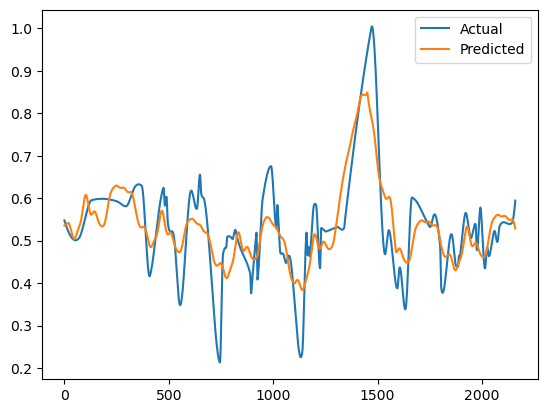

MAE: 0.004640013841002653
RMSE: 0.06811764706008755


/var/folders/4d/_hvc8l4d27x_0_349j1cpw7r0000gn/T/ipykernel_63427/1106354577.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group.drop(group.tail(n).index,


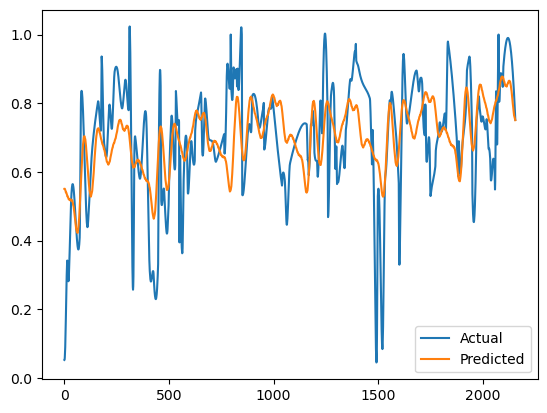

MAE: 0.01918189629757328
RMSE: 0.13849872309004613


/var/folders/4d/_hvc8l4d27x_0_349j1cpw7r0000gn/T/ipykernel_63427/1106354577.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group.drop(group.tail(n).index,


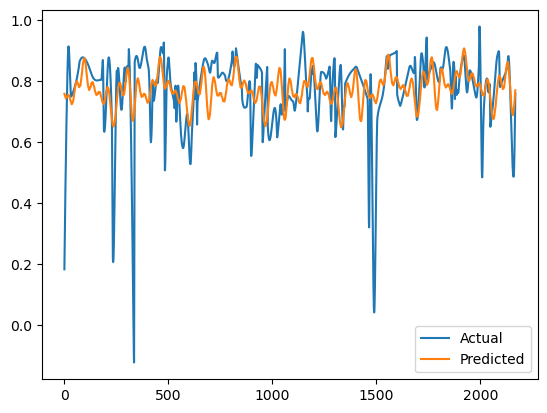

MAE: 0.012546439436021713
RMSE: 0.1120108898099721


/var/folders/4d/_hvc8l4d27x_0_349j1cpw7r0000gn/T/ipykernel_63427/1106354577.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group.drop(group.tail(n).index,


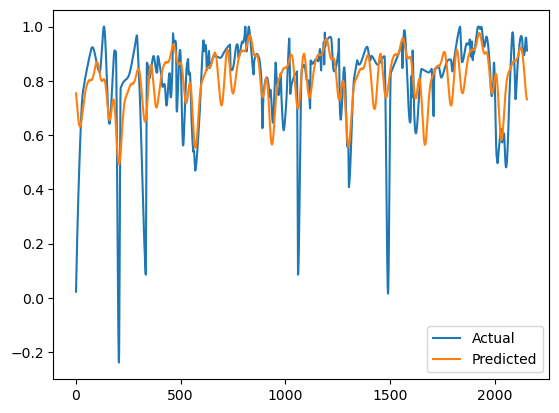

MAE: 0.01776940419478364
RMSE: 0.13330192869866378


/var/folders/4d/_hvc8l4d27x_0_349j1cpw7r0000gn/T/ipykernel_63427/1106354577.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group.drop(group.tail(n).index,


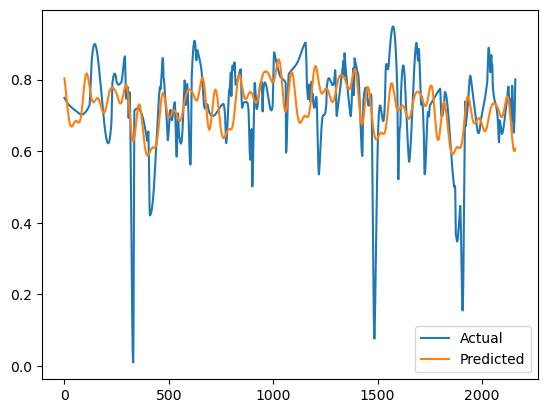

MAE: 0.01117961307265185
RMSE: 0.10573368939298321


/var/folders/4d/_hvc8l4d27x_0_349j1cpw7r0000gn/T/ipykernel_63427/1106354577.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group.drop(group.tail(n).index,


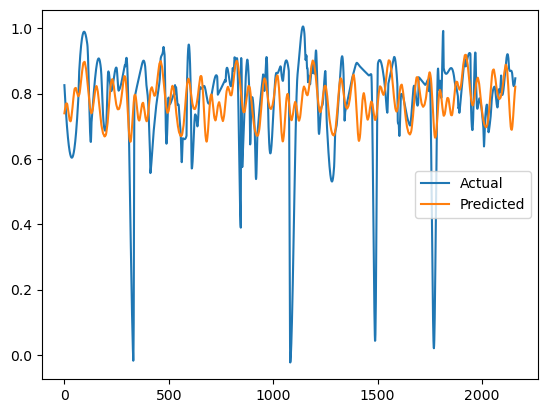

MAE: 0.019500676071713956
RMSE: 0.13964482114175933


/var/folders/4d/_hvc8l4d27x_0_349j1cpw7r0000gn/T/ipykernel_63427/1106354577.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group.drop(group.tail(n).index,


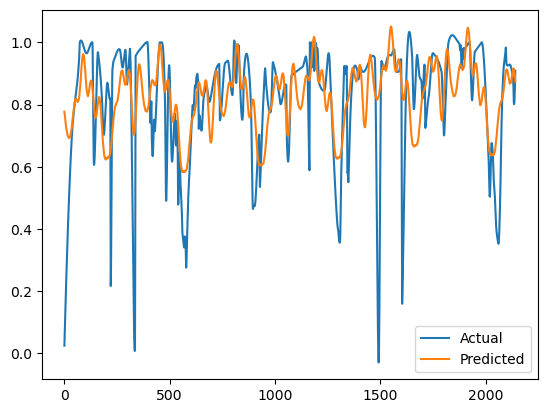

MAE: 0.023374629580161038
RMSE: 0.15288763710699776


/var/folders/4d/_hvc8l4d27x_0_349j1cpw7r0000gn/T/ipykernel_63427/1106354577.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group.drop(group.tail(n).index,


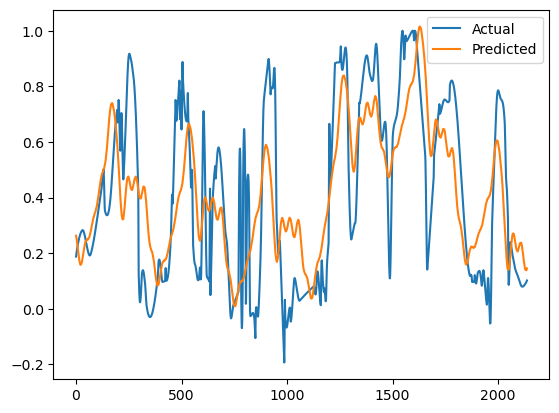

MAE: 0.04716924851563409
RMSE: 0.21718482570298067


/var/folders/4d/_hvc8l4d27x_0_349j1cpw7r0000gn/T/ipykernel_63427/1106354577.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group.drop(group.tail(n).index,


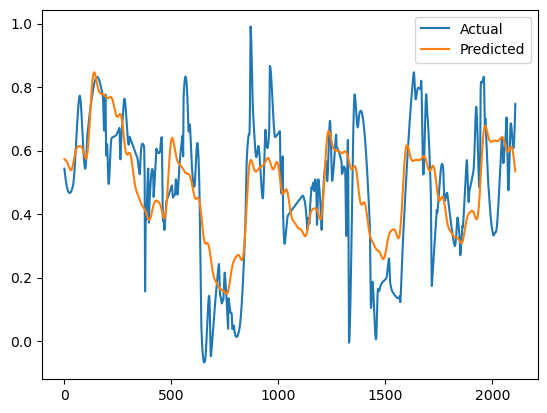

MAE: 0.021530433710756736
RMSE: 0.1467325243794188


/var/folders/4d/_hvc8l4d27x_0_349j1cpw7r0000gn/T/ipykernel_63427/1106354577.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group.drop(group.tail(n).index,


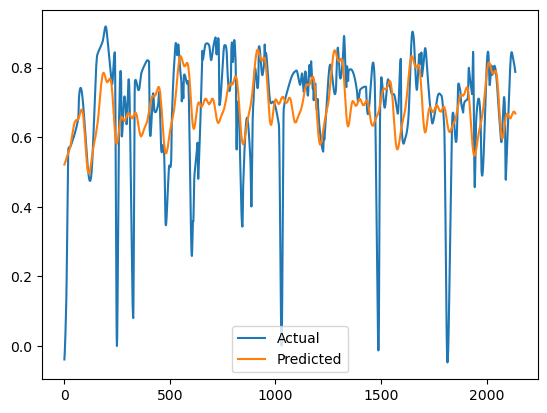

MAE: 0.02077674497744643
RMSE: 0.1441414061865862


/var/folders/4d/_hvc8l4d27x_0_349j1cpw7r0000gn/T/ipykernel_63427/1106354577.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group.drop(group.tail(n).index,


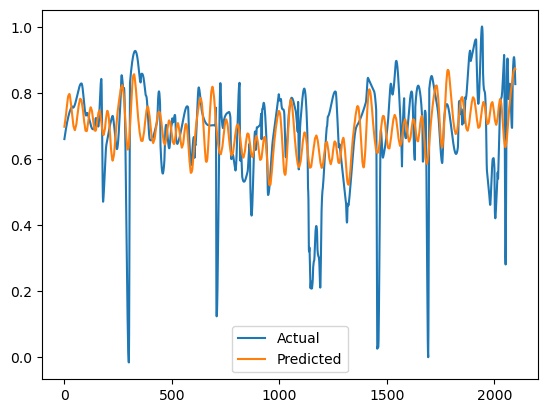

MAE: 0.01772372376833699
RMSE: 0.13313047648204746


/var/folders/4d/_hvc8l4d27x_0_349j1cpw7r0000gn/T/ipykernel_63427/1106354577.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group.drop(group.tail(n).index,


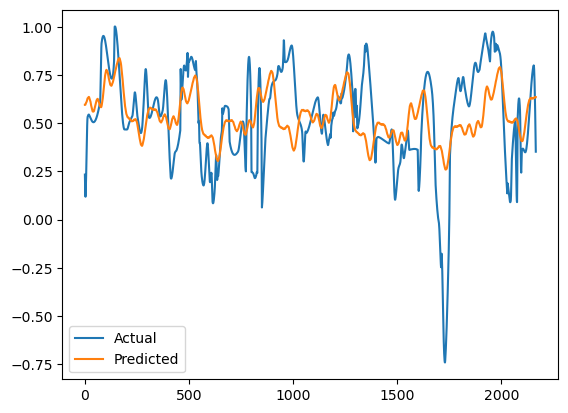

MAE: 0.04959172351164117
RMSE: 0.22269199247310437


/var/folders/4d/_hvc8l4d27x_0_349j1cpw7r0000gn/T/ipykernel_63427/1106354577.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group.drop(group.tail(n).index,


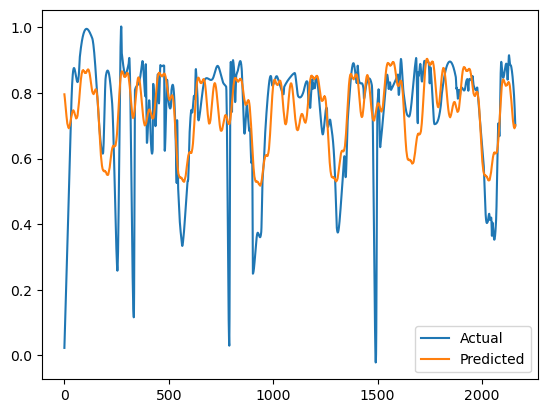

MAE: 0.019298793656921286
RMSE: 0.13892009810290692


/var/folders/4d/_hvc8l4d27x_0_349j1cpw7r0000gn/T/ipykernel_63427/1106354577.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group.drop(group.tail(n).index,


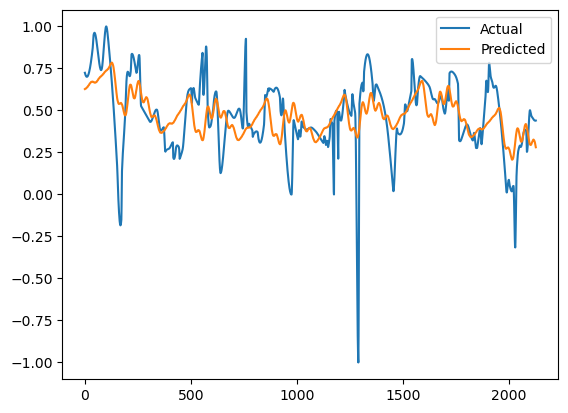

MAE: 0.03584536468265742
RMSE: 0.18932872123018585


/var/folders/4d/_hvc8l4d27x_0_349j1cpw7r0000gn/T/ipykernel_63427/1106354577.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group.drop(group.tail(n).index,


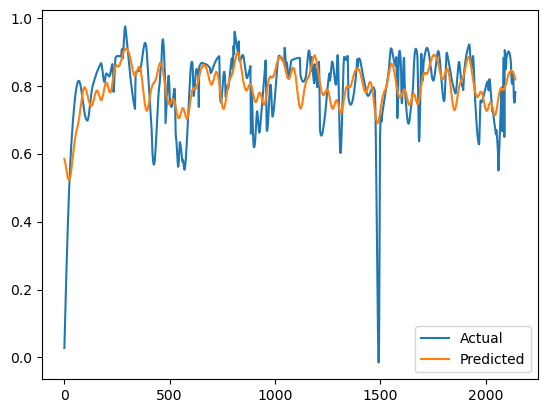

MAE: 0.007968061539634669
RMSE: 0.08926399912414114


/var/folders/4d/_hvc8l4d27x_0_349j1cpw7r0000gn/T/ipykernel_63427/1106354577.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group.drop(group.tail(n).index,


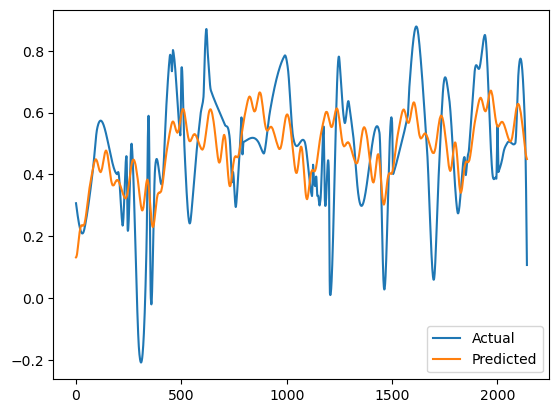

/var/folders/4d/_hvc8l4d27x_0_349j1cpw7r0000gn/T/ipykernel_63427/1106354577.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group.drop(group.tail(n).index,


MAE: 0.026519801319706486
RMSE: 0.16284901387391476


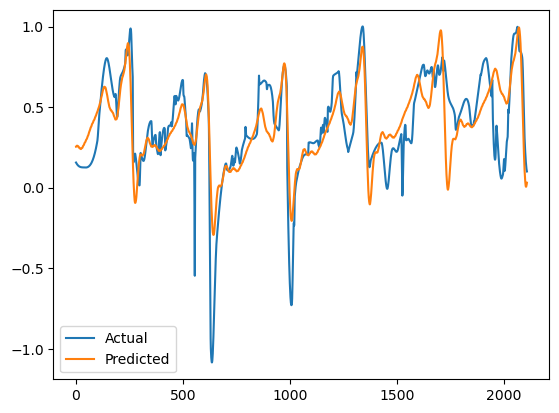

MAE: 0.039023716000242036
RMSE: 0.19754421277334863


/var/folders/4d/_hvc8l4d27x_0_349j1cpw7r0000gn/T/ipykernel_63427/1106354577.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group.drop(group.tail(n).index,


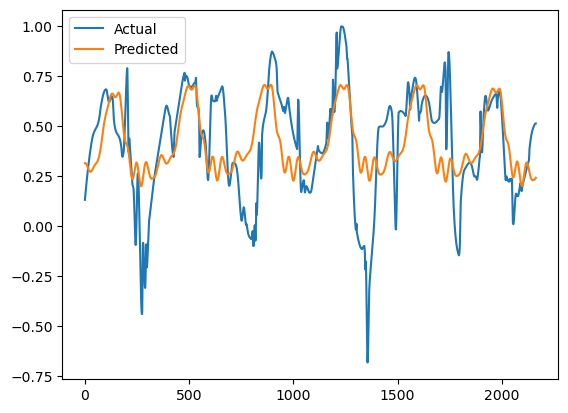

MAE: 0.052374273766898904
RMSE: 0.22885426316085725


/var/folders/4d/_hvc8l4d27x_0_349j1cpw7r0000gn/T/ipykernel_63427/1106354577.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group.drop(group.tail(n).index,


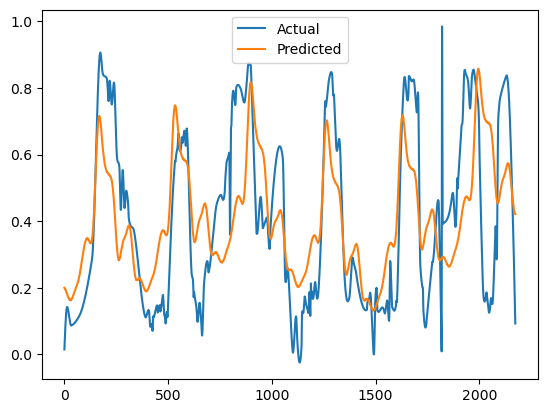

MAE: 0.03937193823584923
RMSE: 0.19842363325937068


/var/folders/4d/_hvc8l4d27x_0_349j1cpw7r0000gn/T/ipykernel_63427/1106354577.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group.drop(group.tail(n).index,


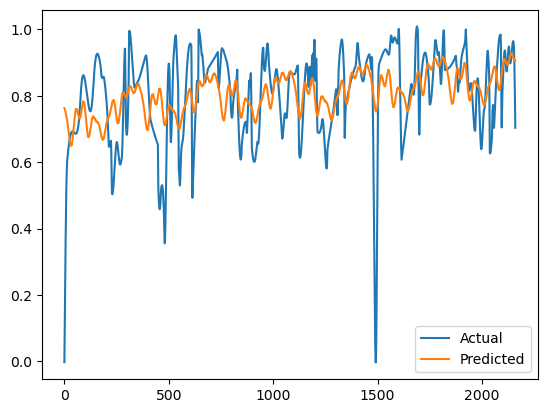

MAE: 0.015059480809732219
RMSE: 0.12271707627601067


/var/folders/4d/_hvc8l4d27x_0_349j1cpw7r0000gn/T/ipykernel_63427/1106354577.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group.drop(group.tail(n).index,


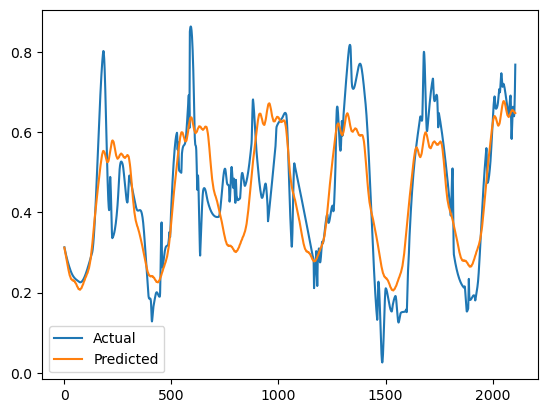

MAE: 0.01025575187549743
RMSE: 0.10127068616088977


/var/folders/4d/_hvc8l4d27x_0_349j1cpw7r0000gn/T/ipykernel_63427/1106354577.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group.drop(group.tail(n).index,


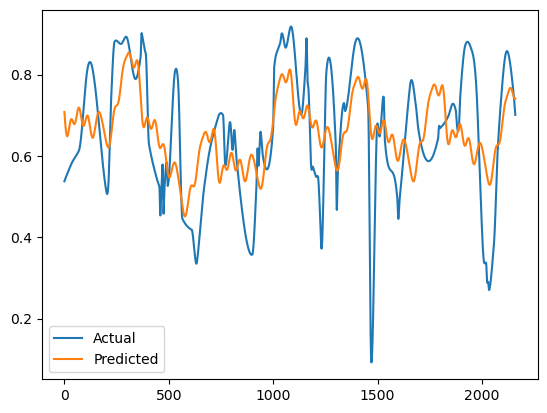

MAE: 0.016784908339433732
RMSE: 0.1295565835433836


/var/folders/4d/_hvc8l4d27x_0_349j1cpw7r0000gn/T/ipykernel_63427/1106354577.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group.drop(group.tail(n).index,


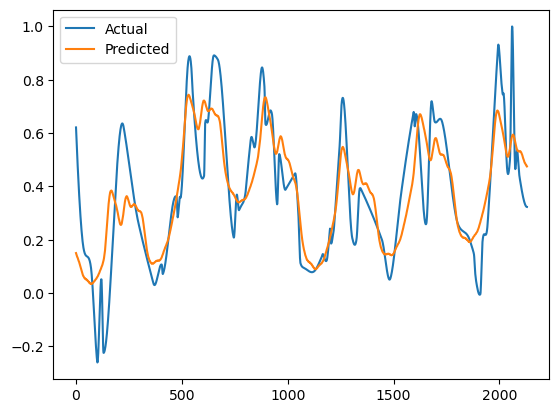

MAE: 0.019545720115593558
RMSE: 0.13980600886797948


/var/folders/4d/_hvc8l4d27x_0_349j1cpw7r0000gn/T/ipykernel_63427/1106354577.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group.drop(group.tail(n).index,


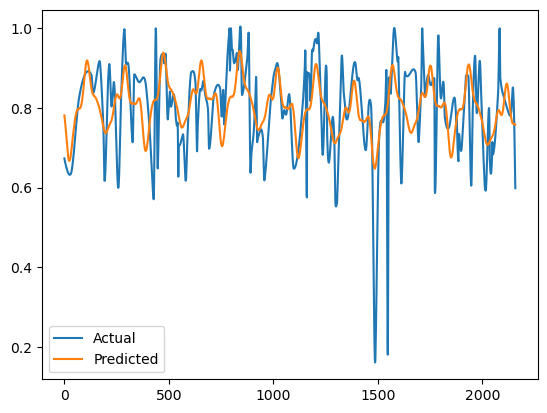

MAE: 0.008655960023447014
RMSE: 0.09303741195587405


/var/folders/4d/_hvc8l4d27x_0_349j1cpw7r0000gn/T/ipykernel_63427/1106354577.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group.drop(group.tail(n).index,


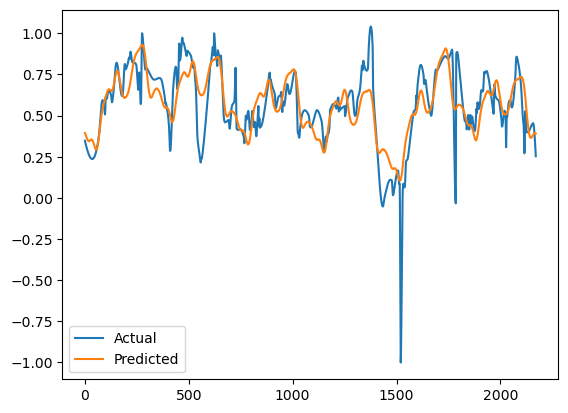

MAE: 0.0200272874495582
RMSE: 0.14151779905566014


/var/folders/4d/_hvc8l4d27x_0_349j1cpw7r0000gn/T/ipykernel_63427/1106354577.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group.drop(group.tail(n).index,


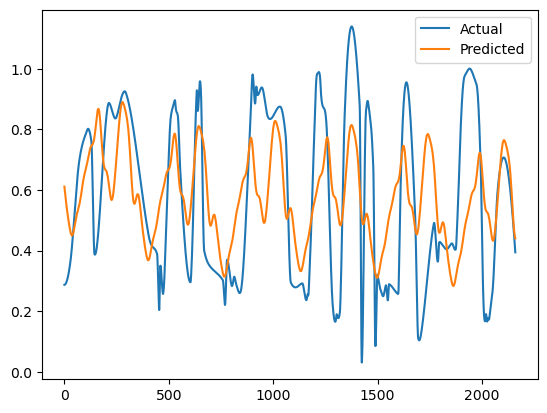

MAE: 0.05338569441044704
RMSE: 0.23105344492226693


/var/folders/4d/_hvc8l4d27x_0_349j1cpw7r0000gn/T/ipykernel_63427/1106354577.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group.drop(group.tail(n).index,


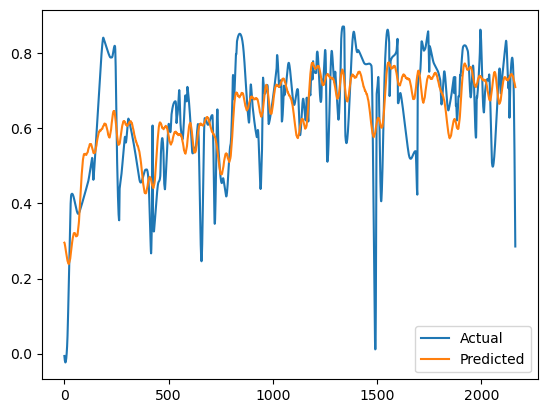

MAE: 0.010983048030588693
RMSE: 0.10480003831387034


/var/folders/4d/_hvc8l4d27x_0_349j1cpw7r0000gn/T/ipykernel_63427/1106354577.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group.drop(group.tail(n).index,


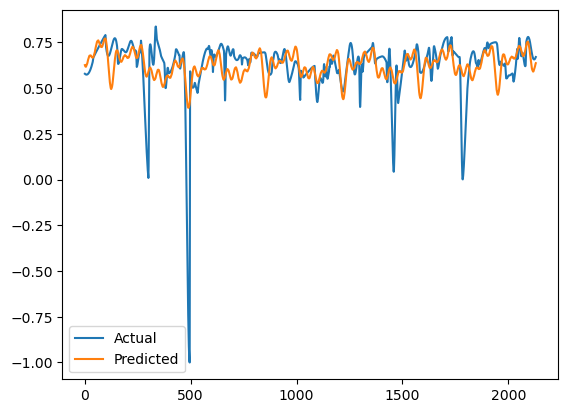

/var/folders/4d/_hvc8l4d27x_0_349j1cpw7r0000gn/T/ipykernel_63427/1106354577.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group.drop(group.tail(n).index,


MAE: 0.02064065126582721
RMSE: 0.1436685465431707


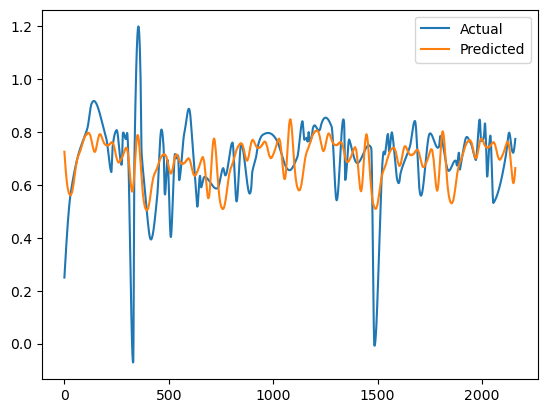

MAE: 0.014847781359908285
RMSE: 0.12185147253894096


/var/folders/4d/_hvc8l4d27x_0_349j1cpw7r0000gn/T/ipykernel_63427/1106354577.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group.drop(group.tail(n).index,


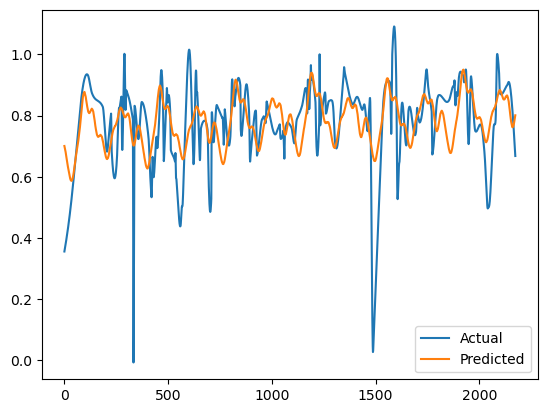

MAE: 0.013087014431650466
RMSE: 0.11439848963885173


/var/folders/4d/_hvc8l4d27x_0_349j1cpw7r0000gn/T/ipykernel_63427/1106354577.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group.drop(group.tail(n).index,


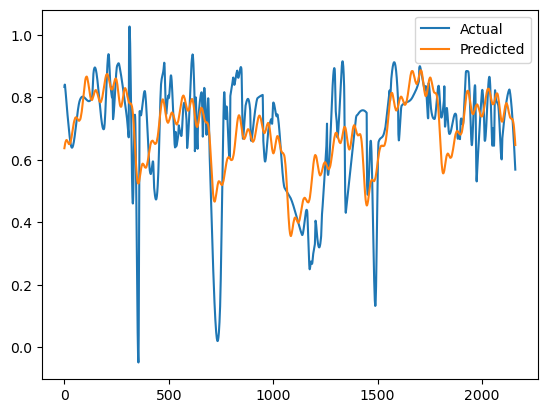

MAE: 0.015821123097518867
RMSE: 0.1257820460062519


/var/folders/4d/_hvc8l4d27x_0_349j1cpw7r0000gn/T/ipykernel_63427/1106354577.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group.drop(group.tail(n).index,


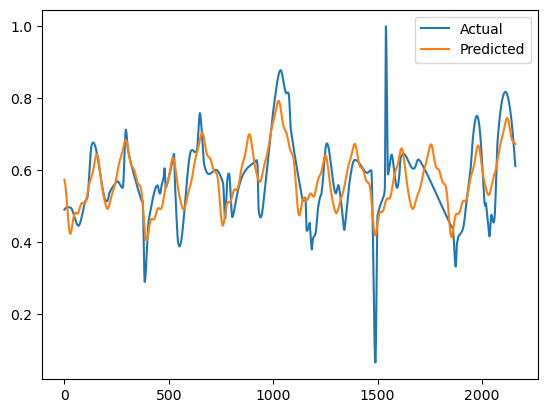

MAE: 0.005232523976753055
RMSE: 0.07233618718700244


/var/folders/4d/_hvc8l4d27x_0_349j1cpw7r0000gn/T/ipykernel_63427/1106354577.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group.drop(group.tail(n).index,


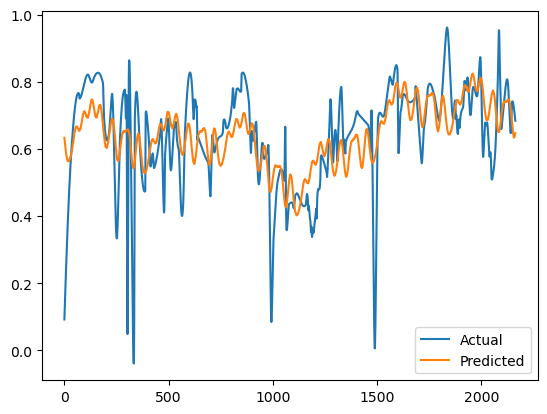

MAE: 0.01360787107438522
RMSE: 0.11665277996852548


/var/folders/4d/_hvc8l4d27x_0_349j1cpw7r0000gn/T/ipykernel_63427/1106354577.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group.drop(group.tail(n).index,


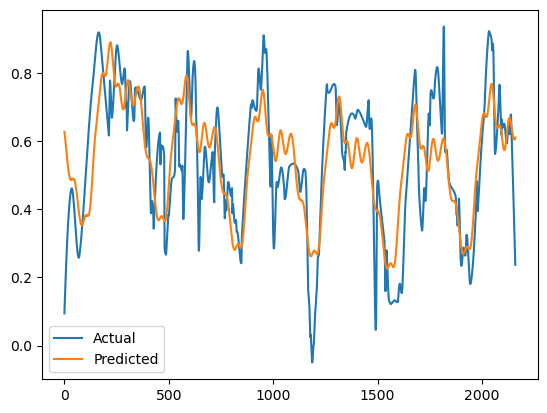

MAE: 0.017116973662240204
RMSE: 0.13083185262863248


In [147]:
from sklearn.metrics import mean_squared_error
# Group the data by ticker
forcasted_by_ticker = forcasted.groupby('ticker')

mse_list = []
rmse_list = []
place_list = []

for tick in ticker_list:
    group = forcasted_by_ticker.get_group(tick)
    
    # Number of rows to drop
    n = days

    # Dropping last n rows using drop
    group.drop(group.tail(n).index,
            inplace = True)
    
    place = group.loc[1]['ticker']
    place_list.append(place)
    
    # plot expected vs actual
    y_true = group['observed_values'].values
    y_pred = group['yhat'].values
    
    plt.plot(y_true, label='Actual')
    plt.plot(y_pred, label='Predicted')
    plt.legend()
    plt.show()
    
    mse = mean_squared_error(y_true,y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    
    print(f'MAE: {mse}')
    print(f'RMSE: {rmse}')
    
    mse_list.append(mse)
    rmse_list.append(rmse)

In [152]:
evaluation_df['place'] = place_list
evaluation_df['MSE'] = mse_list
evaluation_df['RMSE'] = rmse_list
evaluation_df

place  MAE      RMSE       MSE
0         helmond  NaN  0.099848  0.009970
1       nijverdal  NaN  0.133263  0.017759
2       schijndel  NaN  0.111113  0.012346
3       eindhoven  NaN  0.130528  0.017038
4     schoonhoven  NaN  0.111593  0.012453
5       oldenzaal  NaN  0.118399  0.014018
6          raalte  NaN  0.109887  0.012075
7           delft  NaN  0.085979  0.007392
8             urk  NaN  0.197061  0.038833
9       emmeloord  NaN  0.229590  0.052712
10     maastricht  NaN  0.319648  0.102175
11        woerden  NaN  0.100925  0.010186
12        alkmaar  NaN  0.068118  0.004640
13          assen  NaN  0.138499  0.019182
14        leersum  NaN  0.112011  0.012546
15            oss  NaN  0.133302  0.017769
16          hoorn  NaN  0.105734  0.011180
17       oudekerk  NaN  0.139645  0.019501
18        zuthpen  NaN  0.152888  0.023375
19       franeker  NaN  0.217185  0.047169
20        dronten  NaN  0.146733  0.021530
21         lochem  NaN  0.144141  0.020777
22        tilburg  NaN  0.133130  0.017724
23     winschoten  NaN  0.222692  0.049592
24        groenlo  NaN  0.138920  0.019299
25         almere  NaN  0.189329  0.035845
26         almelo  NaN  0.089264  0.007968
27     zoetermeer  NaN  0.162849  0.026520
28  biddinghuizen  NaN  0.197544  0.039024
29        almkerk  NaN  0.228854  0.052374
30         nagele  NaN  0.198424  0.039372
31      hoogeveen  NaN  0.122717  0.015059
32    luttelgeest  NaN  0.101271  0.010256
33     roosendaal  NaN  0.129557  0.016785
34   wieringswerf  NaN  0.139806  0.019546
35          sneek  NaN  0.093037  0.008656
36     middelburg  NaN  0.141518  0.020027
37   middelharnis  NaN  0.231053  0.053386
38         arnhem  NaN  0.104800  0.010983
39      montfoort  NaN  0.143669  0.020641
40    voorschoten  NaN  0.121851  0.014848
41        utrecht  NaN  0.114398  0.013087
42     leeuwarden  NaN  0.125782  0.015821
43       zuidland  NaN  0.072336  0.005233
44   geldermalsen  NaN  0.116653  0.013608
45            ens  NaN  0.130832  0.017117

In [139]:
from statistics import mean 

mean_mse = mean(mse_list)
mean_rmse = mean(rmse_list)
print(f'average MSE: {mean_mse}')
print(f'average RMSE: {mean_rmse}')


average MSE: 0.02276945071713945
average MSE: 0.14252987988615617
